## Formating Data 

I aim to create an aray with panel data that contains the top income distribution, avgerage anual percepitation and avgerage anual temperatures for different states in the US from 1950-2014. I cross-checked random indices in my output final array with my original data to make sure the indexing is indeed preserved. Folder with original files as loaded from my computer can be found on github: INSERT HERE

Data is sourced from: INSERT HERE



In [560]:
import random
import glob
import pandas as pd
import itertools

from linearmodels import PanelOLS
from linearmodels import RandomEffects



import numpy as np
import matplotlib.pyplot as plt


In [529]:
#Get all files to iterate over - every file corresponds to a different state
path ='/Users/Elzette/Desktop/Thesis_Data/Income'
filenames = glob.glob(path + "/*.csv")
filenames.sort() #sort in alphabetical order
inequality = []
i = 0

#Add data in files to list i.e. every entry in list is an array countaining data points for respective state
for filename in filenames:
    inequality.append( pd.read_csv(filename, ';',
                           header=0)[:99] ) 

    
#Reformat dates and select relevant dates to ensure all data is available for all regressands
for i in range(len(inequality)):
    item = inequality[i]
    item = item.drop(item.index[0])
    item['Year'] = list(map(int, item['Year'] )) 
    inequality[i]= item.loc[ item['Year'] > 1949 , :]
    item = item[33:]

Index(['Unnamed: 0', 'State', 'Year', 'Top 10% (90th_100th percentiles)',
       'Top 5% (95th_100th percentiles)', 'Top 1% (99th_100th percentiles)',
       'Top 0.5% (99.5th_   100th percentiles)',
       'Top 0.1% (99.9th_   100th percentiles)',
       'Top 0.01% (99.99th_ 100th percentiles)', 'Unnamed: 9',
       '90th_95th percentiles', '95th_99th percentiles',
       '99th_99.5th percentiles', '99.5th_99.9th percentiles',
       '99.9th_    99.99th percentiles'],
      dtype='object')

In [364]:
# get data file names
path ='/Users/Elzette/Desktop/Thesis_Data/Percipitation'
filenames = glob.glob(path + "/*.csv")
filenames.sort()
rain = []

#add data in files to list 
for filename in filenames:
    rain.append( pd.read_csv(filename,header=4)[:65])

#reformat date 
for item in rain:
    item['Date'] = [1950+i for i in range(65)]


In [365]:
# get data file names
path ='/Users/Elzette/Desktop/Thesis_Data/Airtemp'
filenames = glob.glob(path + "/*.csv")
filenames.sort()
airtemp = []


#select and load relevant data
for filename in filenames:
        airtemp.append( pd.read_csv(filename)[:65] )
        

#appropriate reformat date 
for item in airtemp:
    item['Date'] = [1950+i for i in range(65)]




In [591]:
dummies = pd.read_csv('/Users/Elzette/Desktop/Thesis_Data/Dummies.csv',';')

dummies  = dummies.sort_values('State')


In [597]:
states_all = []
year_all = []
income_all = []
rain_all = []
temp_all = []
#top_3rd = []
#bottom_3rd = []

#create aray that conserves information in correct order for states 

for i in range(46):
    states_all.append(inequality[i].State)
    year_all.append(inequality[i].Year)
    income_all.append(inequality[i]['Top 10% (90th_100th percentiles)'])
    rain_all.append(rain[i].Value)
    temp_all.append(airtemp[i].Value)
    #top_3rd.append([dummies['Top_3rd'][i] for j in range(len(inequality[i].State))])
    #bottom_3rd.append([dummies['Bottom_3rd'][i] for j in range(len(inequality[i].State))])


    
#turn array into columns that stack data po
states = pd.concat(states_all,ignore_index = True)
time = pd.concat(year_all,ignore_index = True)
ineq = pd.concat(income_all,ignore_index = True)
hot = pd.concat(temp_all,ignore_index = True)
water = pd.concat(rain_all,ignore_index = True)
#top_3rd = pd.concat(top_3rd,ignore_index = True)
#bottom_3rd = pd.concat(bottom_3rd,ignore_index = True)



#top_3rd = list(itertools.chain.from_iterable(top_3rd))
#bottom_3rd = list(itertools.chain.from_iterable(bottom_3rd))



In [625]:
#Create pandas data frame with ordered columns  & save as csv

data = {'States': states, 'Year':time,'Top_10%':ineq ,'Avg_temp':hot , 'Avg_rain':water } #'Top_3rd': top_3rd,'Bottom_3rd': bottom_3rd } 

df = pd.DataFrame(data)
df.to_csv('/Users/Elzette/Desktop/Thesis_Data/panel_data.csv')

In [626]:
print(df.groupby('States')['Avg_rain'].describe())

                count       mean       std    min    25%    50%    75%    max
States                                                                       
Alabama          65.0  55.609538  7.915963  35.40  50.10  55.96  59.88  74.76
Alaska           65.0  36.339692  3.080263  28.62  34.09  36.75  38.74  41.09
Arizona          65.0  12.132615  2.806340   6.04  10.61  11.72  13.66  20.13
Arkansas         65.0  50.156923  8.281332  32.80  44.84  48.93  55.25  72.20
California       65.0  22.376769  6.133923   7.93  17.85  21.77  24.74  42.46
Colorado         65.0  17.823846  2.562260  11.85  15.99  17.98  19.14  25.41
Connecticut      65.0  48.167538  7.051706  30.73  43.78  47.77  51.63  63.69
Delaware         65.0  43.697077  6.331902  29.86  38.92  43.05  46.52  57.90
Florida          65.0  53.438769  6.714003  40.29  48.64  52.81  58.49  70.80
Georgia          65.0  49.778154  7.217064  31.06  44.85  49.32  55.61  70.46
Idaho            65.0  24.101692  3.588122  17.64  21.58  23.68 

In [623]:

beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/Elzette/Desktop/Thesis_Data/rain_des.text', 'w')
f.write(beginningtex)
f.write(df.groupby('States')['Avg_rain'].describe().to_latex())
f.write(endtex)
f.close()


beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/Elzette/Desktop/Thesis_Data/temp_des.text', 'w')
f.write(beginningtex)
f.write(df.groupby('States')['Avg_temp'].describe().to_latex())
f.write(endtex)
f.close()


Alabama


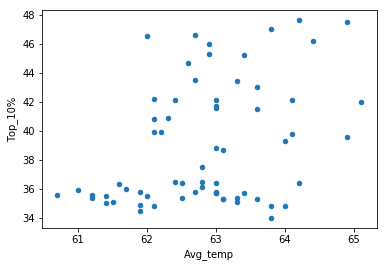

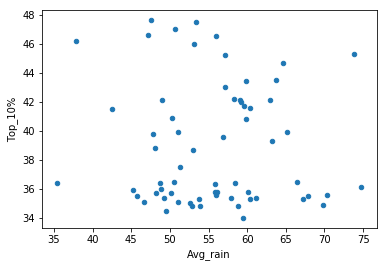

Alaska


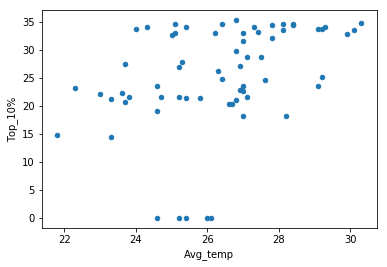

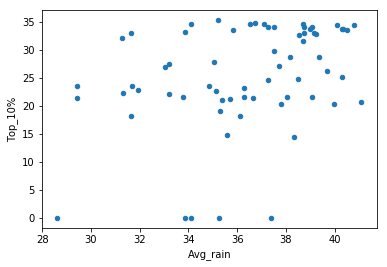

Arizona


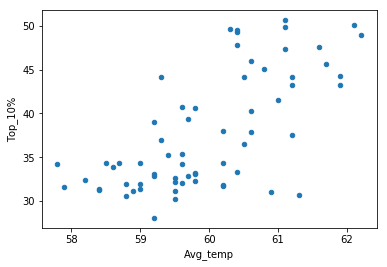

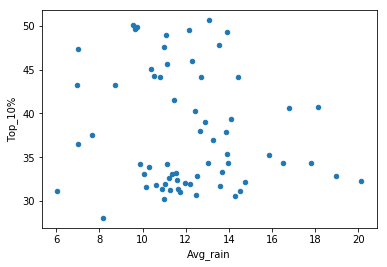

Arkansas


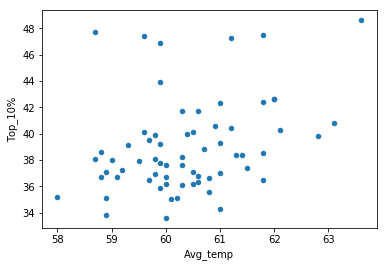

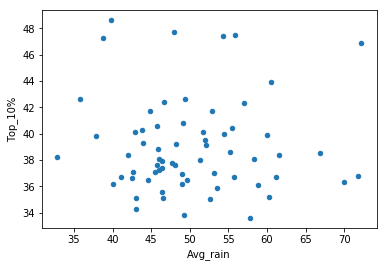

California


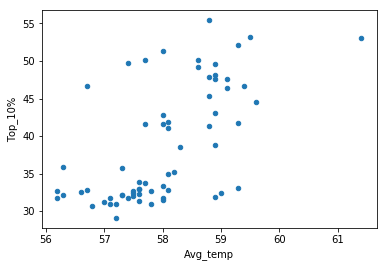

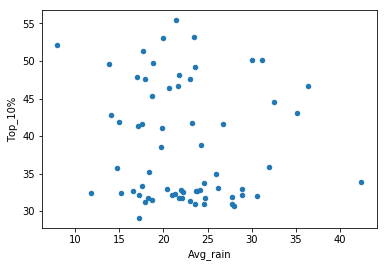

Colorado


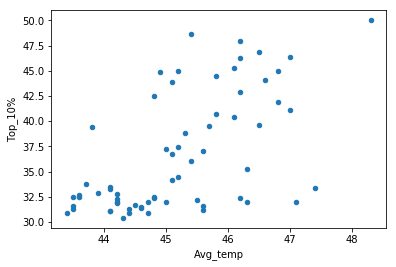

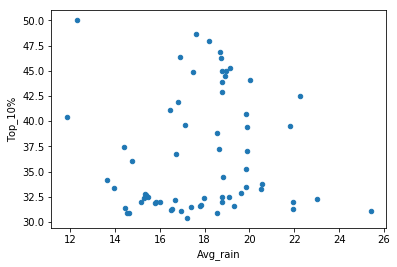

Connecticut


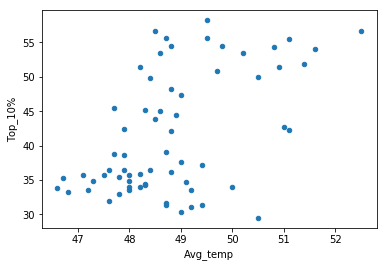

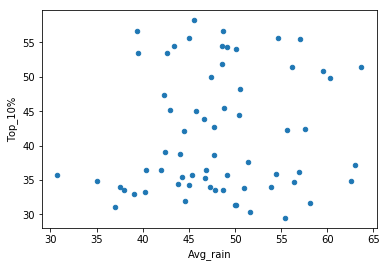

Delaware


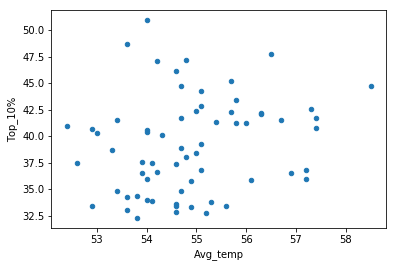

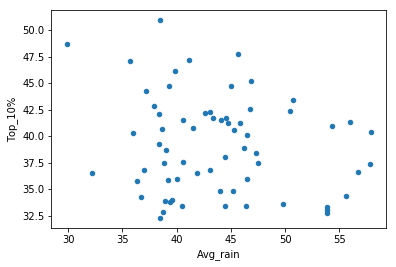

Florida


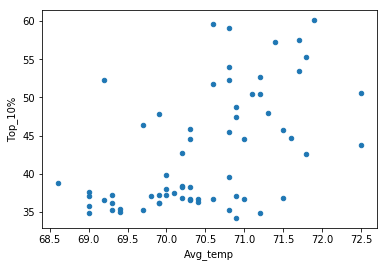

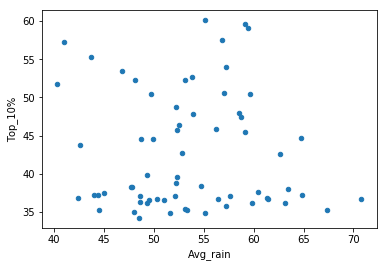

Georgia


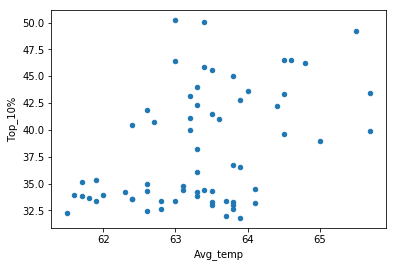

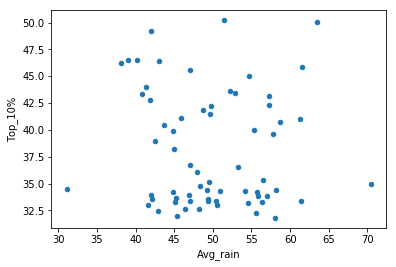

Idaho


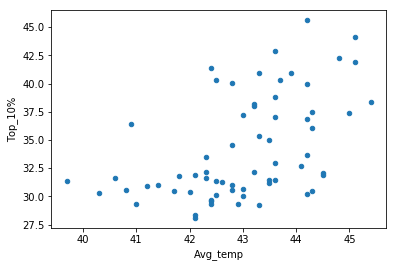

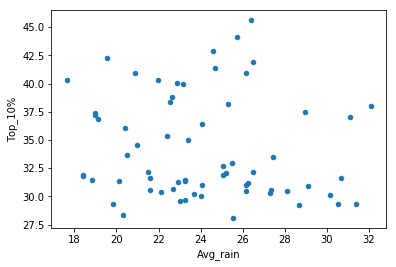

Illinois


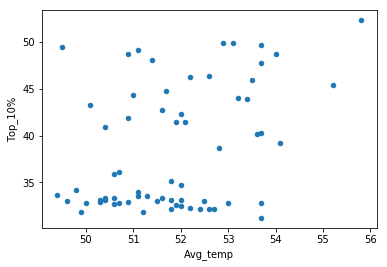

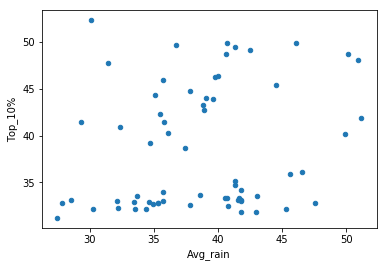

Indiana


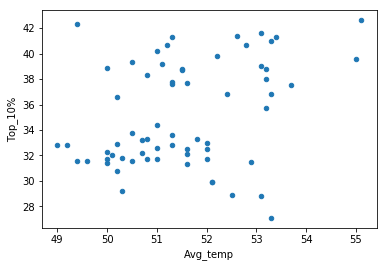

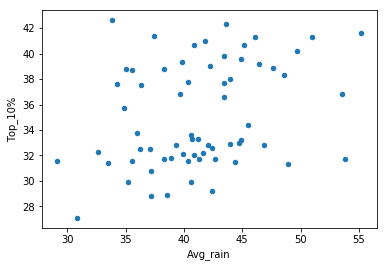

Iowa


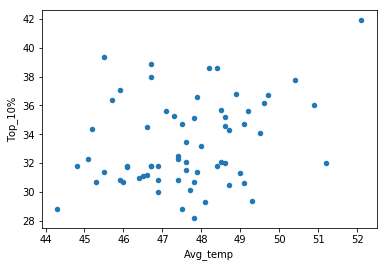

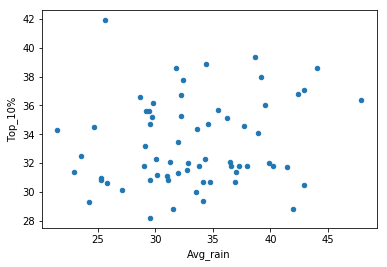

Kansas


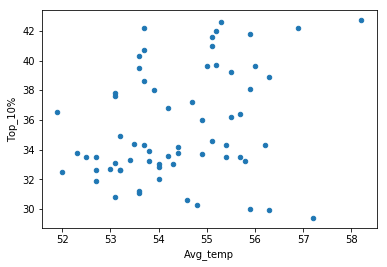

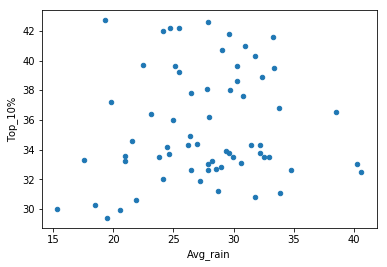

Kentucky


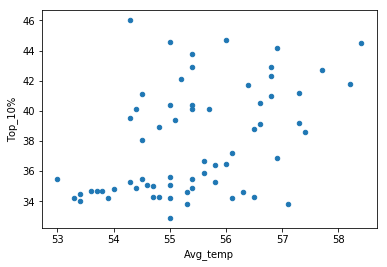

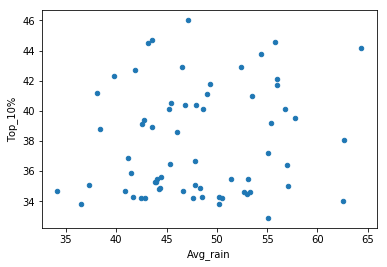

Louisiana


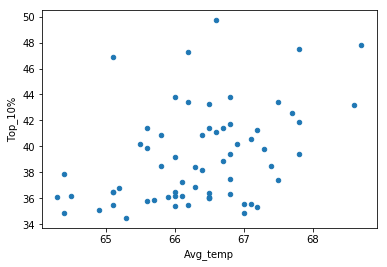

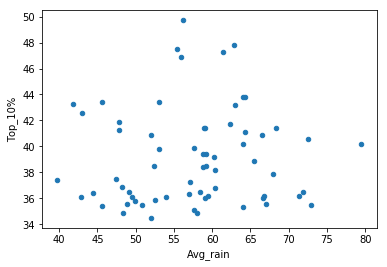

Maine


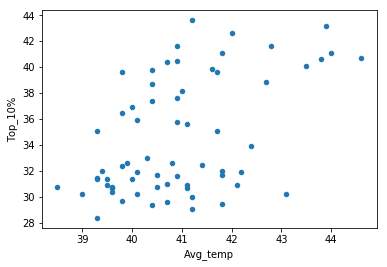

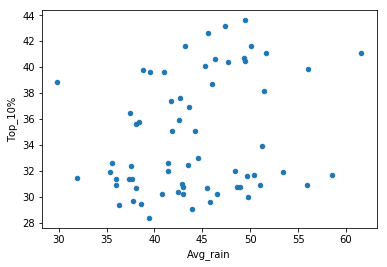

Maryland


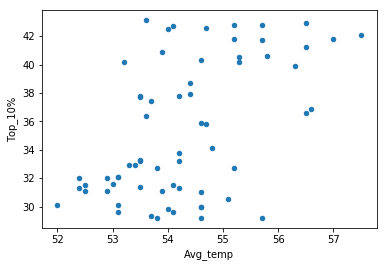

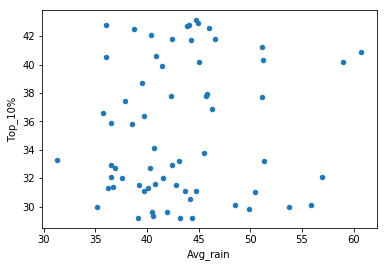

Massachusetts


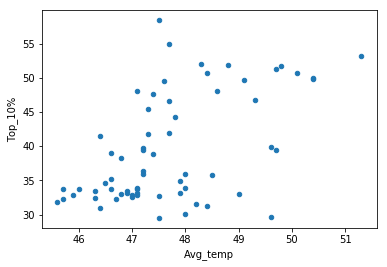

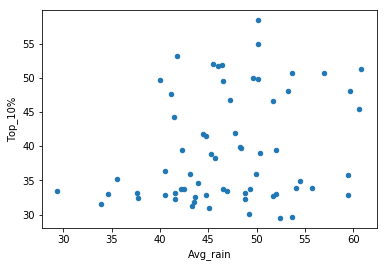

Michigan


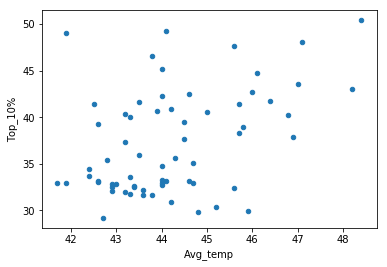

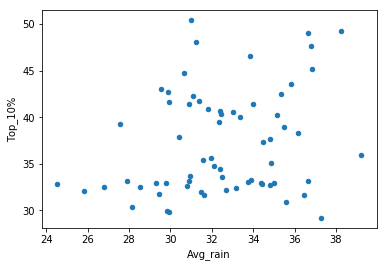

Minnesota


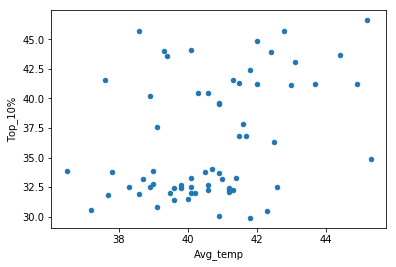

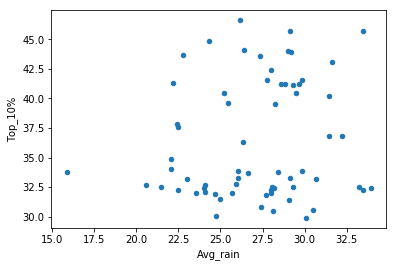

Mississippi


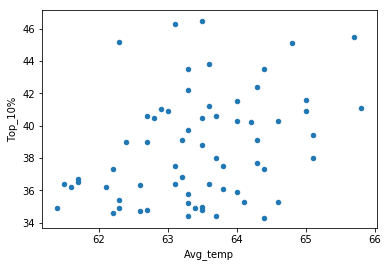

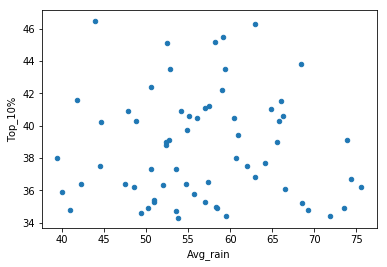

Missouri


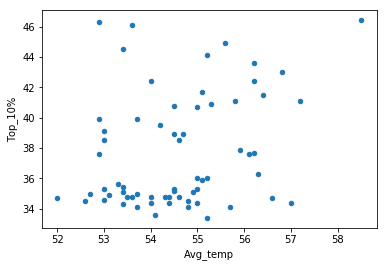

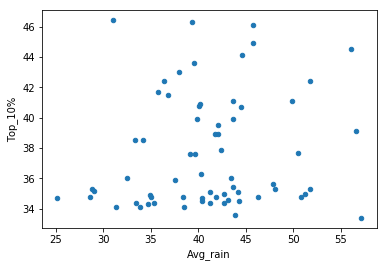

Montana


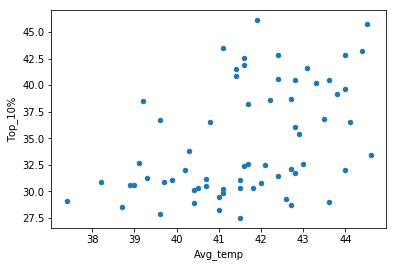

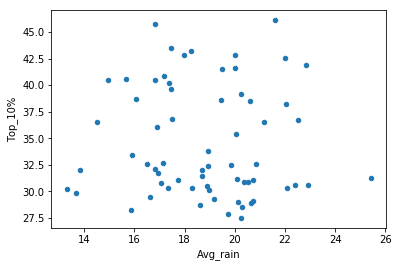

Nebraska


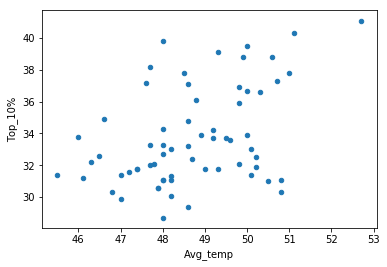

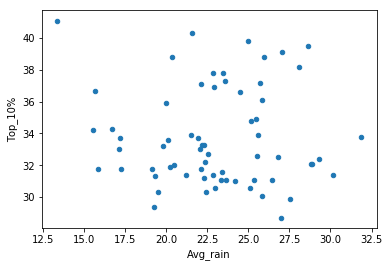

Nevada


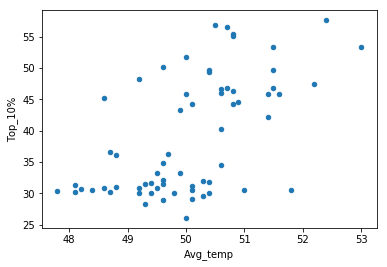

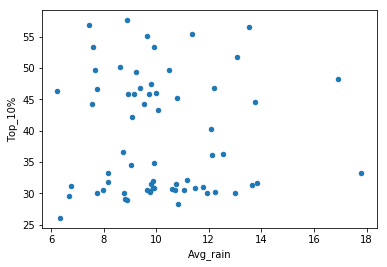

New Hampshire


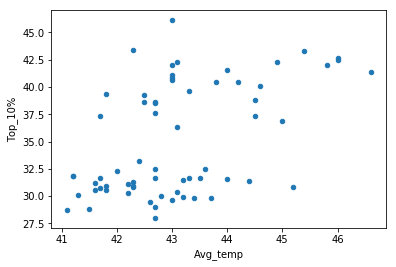

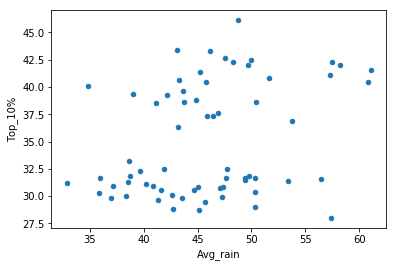

New Jersey


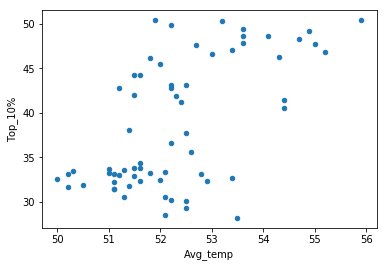

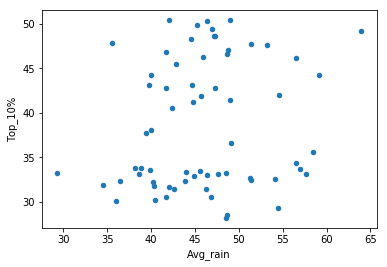

New Mexico


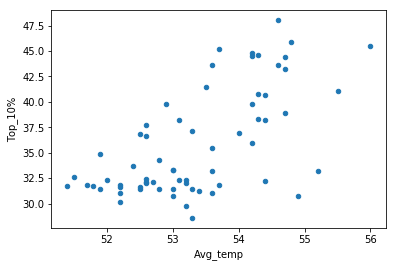

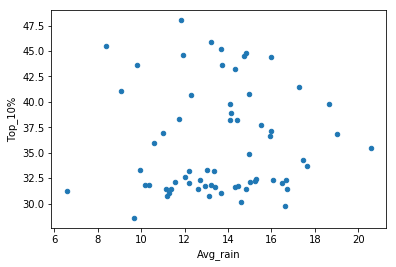

New York


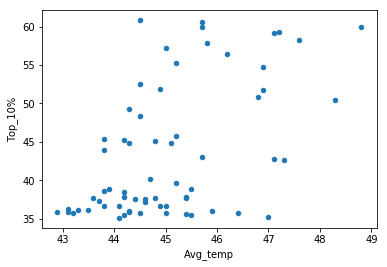

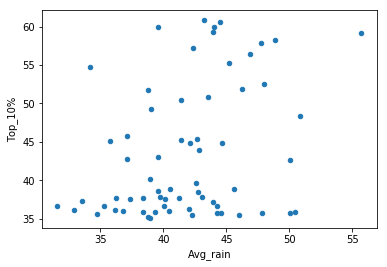

North Carolina


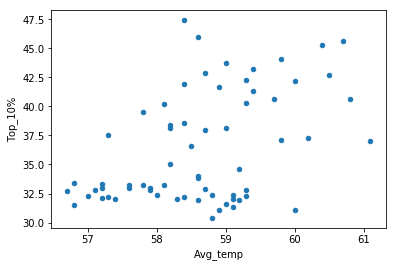

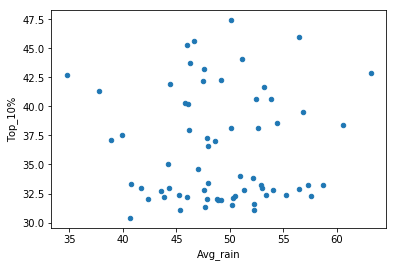

North Dakota


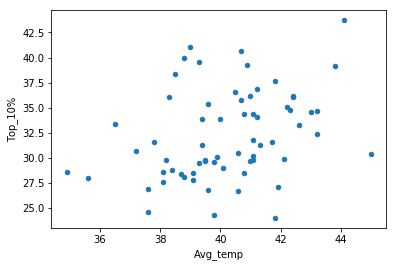

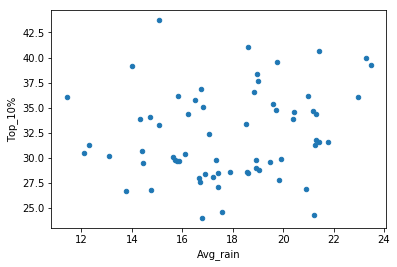

Ohio


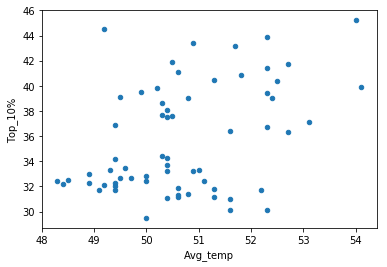

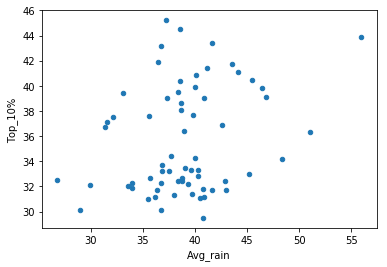

Oklahoma


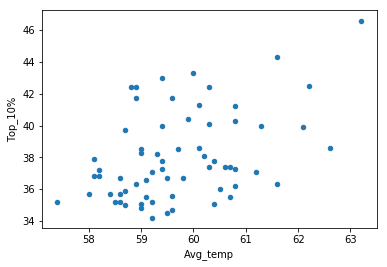

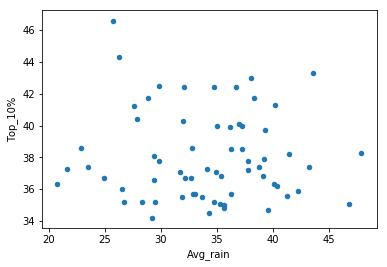

Oregon


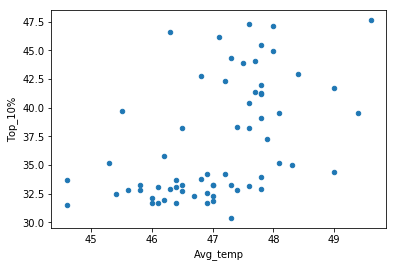

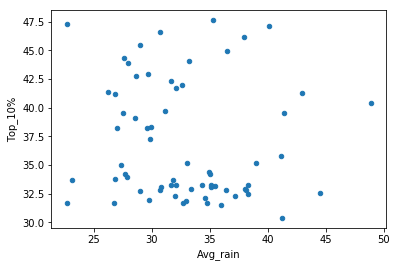

Pennsylvania


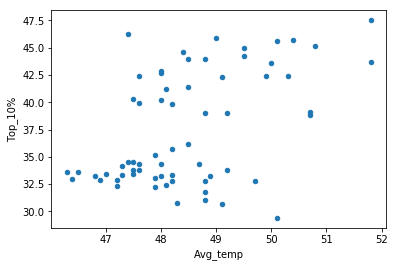

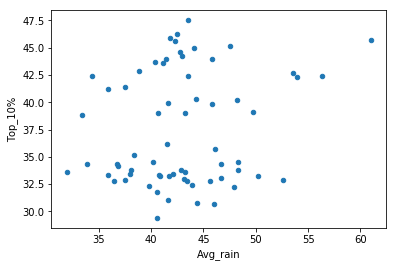

Rhode Island


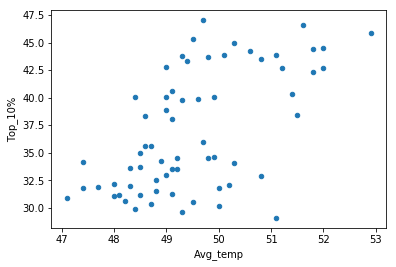

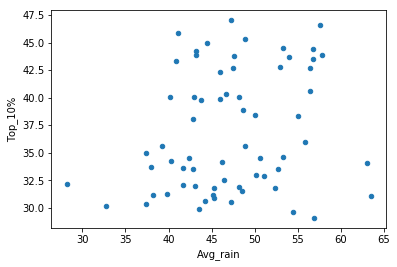

South Carolina


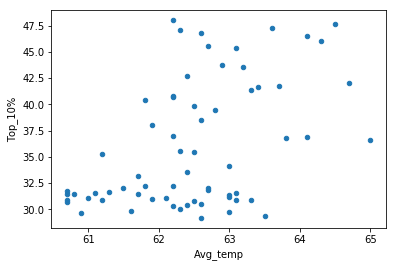

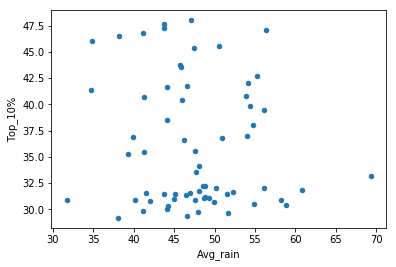

South Dakota


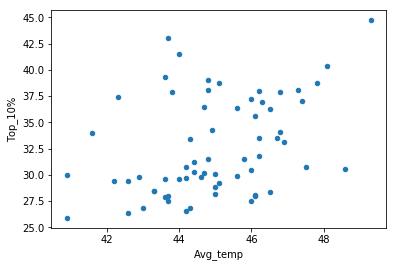

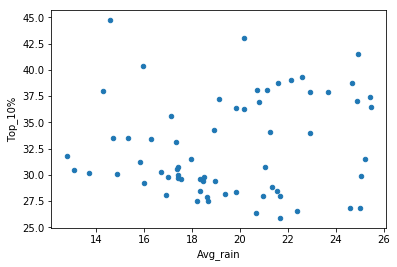

Tennessee


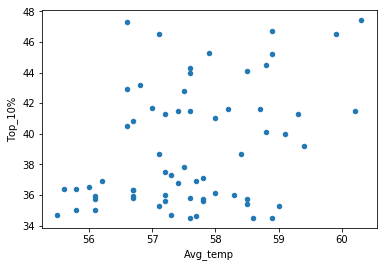

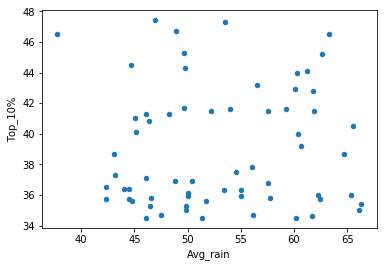

Texas


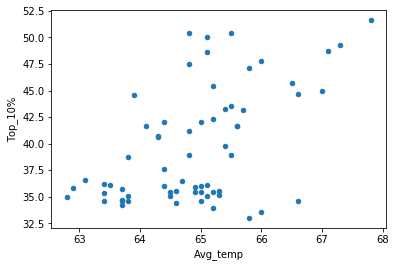

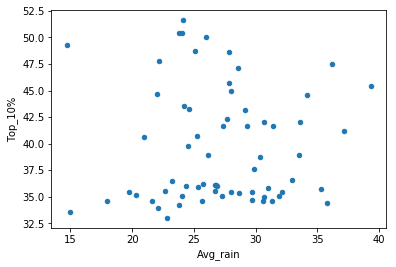

Utah


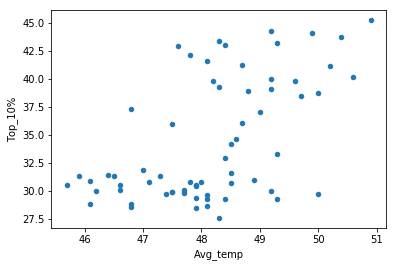

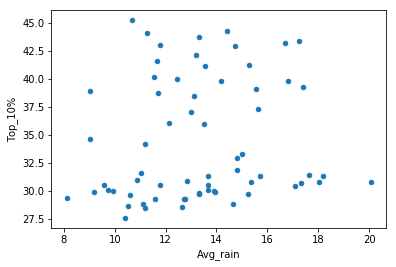

Vermont


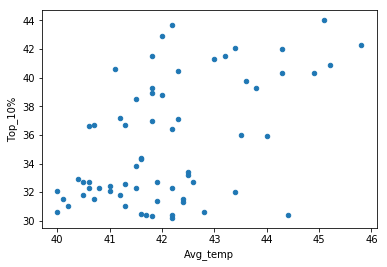

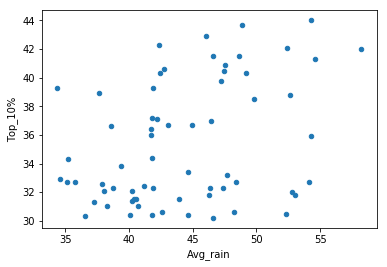

Virginia


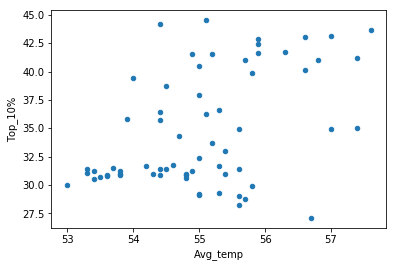

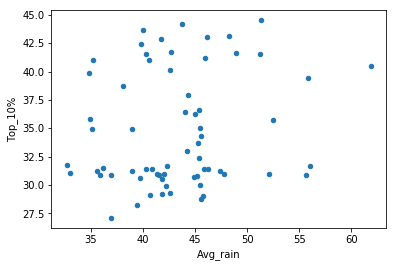

Washington


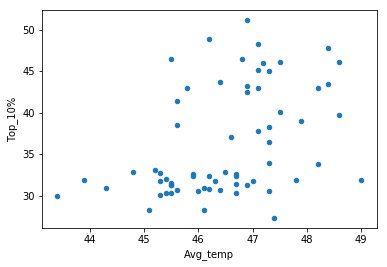

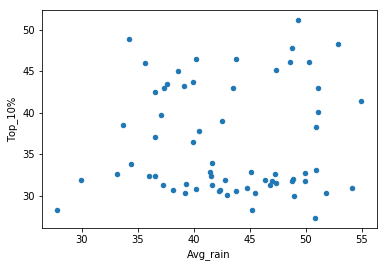

In [643]:
things = list(df.groupby('States'))

for item in things:
    print(item[0])
    item[1].plot(kind='scatter',x='Avg_temp',y='Top_10%')
    item[1].plot(kind='scatter',x='Avg_rain',y='Top_10%')
    plt.show()

In [564]:
#convert year to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
#add column year to index
df=df.set_index('States','Year', append=True)
#swap indexes
df.index = df.index.swaplevel(0,1)
print (df.head)

<bound method NDFrame.head of                  Avg_rain  Avg_temp  Bottom_3rd  Top_10%  Top_3rd       Year
States                                                                      
Alabama    0        53.04      63.1           0     38.7        1 1950-01-01
           1        52.92      63.8           0     34.8        1 1951-01-01
           2        46.70      63.3           0     35.1        1 1952-01-01
           3        59.45      63.8           0     34.0        1 1953-01-01
           4        35.40      64.2           0     36.4        1 1954-01-01
           5        48.16      63.4           0     35.7        1 1955-01-01
           6        53.72      63.6           0     35.3        1 1956-01-01
           7        58.86      64.0           0     34.8        1 1957-01-01
           8        49.22      61.2           0     35.4        1 1958-01-01
           9        56.11      63.0           0     35.8        1 1959-01-01
           10       51.02      61.5           

In [504]:
df.shape[0]

2990

In [570]:
y = df['Top_10%']
x = df[['Avg_temp', "Avg_rain",'Top_3rd','Bottom_3rd']] #, df['Avg_rain']]#df['Avg_rain']
x.loc[:, 'constant'] = pd.DataFrame( [1 for i in range(df.shape[0])] )

x = x.fillna(value=1)

x

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if isinstance(ax, MultiIndex) and not (
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # hasattr first, to avoid coercing to ndarray without reason.


Avg_temp  Avg_rain  Top_3rd  Bottom_3rd  constant
States                                                            
Alabama    0         63.1     53.04        1           0       1.0
           1         63.8     52.92        1           0       1.0
           2         63.3     46.70        1           0       1.0
           3         63.8     59.45        1           0       1.0
           4         64.2     35.40        1           0       1.0
           5         63.4     48.16        1           0       1.0
           6         63.6     53.72        1           0       1.0
           7         64.0     58.86        1           0       1.0
           8         61.2     49.22        1           0       1.0
           9         63.0     56.11        1           0       1.0
           10        61.5     51.02        1           0       1.0
           11        61.9     69.83        1           0       1.0
           12        63.0     50.10        1           0       1.0
           13        61.7     48.82        1           0       1.0
           14        62.4     66.50        1           0       1.0
           15        63.0     48.78        1           0       1.0
           16        61.6     55.82        1           0       1.0
           17        61.9     55.81        1           0       1.0
           18        61.0     45.21        1           0       1.0
           19        61.4     52.57        1           0       1.0
           20        62.1     53.89        1           0       1.0
           21        62.7     60.07        1           0       1.0
           22        63.0     55.96        1           0       1.0
           23        63.1     67.17        1           0       1.0
           24        63.1     60.40        1           0       1.0
           25        62.8     74.76        1           0       1.0
           26        60.7     55.98        1           0       1.0
           27        62.5     57.87        1           0       1.0
           28        61.9     49.50        1           0       1.0
           29        61.4     67.92        1           0       1.0
...                   ...       ...      ...         ...       ...
Washington 2960      43.9     29.99        0           1       1.0
           2961      47.3     41.63        0           1       1.0
           2962      48.2     34.39        0           1       1.0
           2963      47.3     39.95        0           1       1.0
           2964      46.6     36.56        0           1       1.0
           2965      47.3     50.91        0           1       1.0
           2966      47.1     40.48        0           1       1.0
           2967      48.6     37.13        0           1       1.0
           2968      45.6     33.68        0           1       1.0
           2969      47.9     42.51        0           1       1.0
           2970      47.5     51.08        0           1       1.0
           2971      45.6     54.95        0           1       1.0
           2972      47.1     51.07        0           1       1.0
           2973      48.6     48.61        0           1       1.0
           2974      46.9     49.30        0           1       1.0
           2975      46.2     34.21        0           1       1.0
           2976      46.9     39.16        0           1       1.0
           2977      46.9     36.51        0           1       1.0
           2978      48.2     43.47        0           1       1.0
           2979      48.4     37.65        0           1       1.0
           2980      47.3     38.64        0           1       1.0
           2981      47.5     50.26        0           1       1.0
           2982      46.8     40.24        0           1       1.0
           2983      45.8     37.39        0           1       1.0
           2984      46.4     39.90        0           1       1.0
           2985      47.1     47.32        0           1       1.0
           2986      45.5     43.82        0           1       1

In [571]:

reg1 = PanelOLS(y ,x,  drop_absorbed=True ).fit(debiased=True, use_lsdv=True )


beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/Elzette/Desktop/Thesis_Data/Panel_dummies.text', 'w')
f.write(beginningtex)
f.write(reg1.summary.as_latex())
f.write(endtex)
f.close()

In [572]:
reg2 = RandomEffects(y ,x).fit(debiased=True)

beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/Elzette/Desktop/Thesis_Data/Random_dummies.text', 'w')
f.write(beginningtex)
f.write(reg2.summary.as_latex())
f.write(endtex)
f.close()

In [594]:
#interaction

Avg_temp_t3= df['Avg_temp'].mul(df['Top_3rd'])
Avg_temp_b3= df['Avg_temp'].mul(df['Bottom_3rd'])

Avg_rain_t3= df['Avg_rain'].mul(df['Top_3rd'])
Avg_rain_b3= df['Avg_rain'].mul(df['Bottom_3rd'])



#Create pandas data frame with ordered columns  & save as csv

data = {'States': states, 'Year':time,'Top_10%':ineq ,'Avg_temp_t3':Avg_temp_t3 , 'Avg_temp_b3':Avg_temp_b3 , 'Avg_rain_t3': Avg_rain_t3,'Avg_rain_b3': Avg_rain_b3 ,'Avg_temp':hot , 'Avg_rain':water  } 

df = pd.DataFrame(data)
#df.to_csv('/Users/Elzette/Desktop/Thesis_Data/panel_data.csv')

#convert year to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
#add column year to index
df=df.set_index('States','Year', append=True)
#swap indexes
df.index = df.index.swaplevel(0,1)
print (df.head)

y= df['Top_10%']
x = df[['Avg_temp', "Avg_rain", 'Avg_temp_b3' , 'Avg_temp_t3','Avg_rain_b3' , 'Avg_rain_t3']] #, df['Avg_rain']]#df['Avg_rain']
x.loc[:, 'constant'] = pd.DataFrame( [1 for i in range(df.shape[0])] )

x = x.fillna(value=1)

x

<bound method NDFrame.head of                  Avg_rain  Avg_rain_b3  Avg_rain_t3  Avg_temp  Avg_temp_b3  \
States                                                                       
Alabama    0        53.04         0.00        53.04      63.1          0.0   
           1        52.92         0.00        52.92      63.8          0.0   
           2        46.70         0.00        46.70      63.3          0.0   
           3        59.45         0.00        59.45      63.8          0.0   
           4        35.40         0.00        35.40      64.2          0.0   
           5        48.16         0.00        48.16      63.4          0.0   
           6        53.72         0.00        53.72      63.6          0.0   
           7        58.86         0.00        58.86      64.0          0.0   
           8        49.22         0.00        49.22      61.2          0.0   
           9        56.11         0.00        56.11      63.0          0.0   
           10       51.02         

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if isinstance(ax, MultiIndex) and not (
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Avg_temp  Avg_rain  Avg_temp_b3  Avg_temp_t3  Avg_rain_b3  \
States                                                                       
Alabama    0         63.1     53.04          0.0         63.1         0.00   
           1         63.8     52.92          0.0         63.8         0.00   
           2         63.3     46.70          0.0         63.3         0.00   
           3         63.8     59.45          0.0         63.8         0.00   
           4         64.2     35.40          0.0         64.2         0.00   
           5         63.4     48.16          0.0         63.4         0.00   
           6         63.6     53.72          0.0         63.6         0.00   
           7         64.0     58.86          0.0         64.0         0.00   
           8         61.2     49.22          0.0         61.2         0.00   
           9         63.0     56.11          0.0         63.0         0.00   
           10        61.5     51.02          0.0         61.5         0.00   
           11        61.9     69.83          0.0         61.9         0.00   
           12        63.0     50.10          0.0         63.0         0.00   
           13        61.7     48.82          0.0         61.7         0.00   
           14        62.4     66.50          0.0         62.4         0.00   
           15        63.0     48.78          0.0         63.0         0.00   
           16        61.6     55.82          0.0         61.6         0.00   
           17        61.9     55.81          0.0         61.9         0.00   
           18        61.0     45.21          0.0         61.0         0.00   
           19        61.4     52.57          0.0         61.4         0.00   
           20        62.1     53.89          0.0         62.1         0.00   
           21        62.7     60.07          0.0         62.7         0.00   
           22        63.0     55.96          0.0         63.0         0.00   
           23        63.1     67.17          0.0         63.1         0.00   
           24        63.1     60.40          0.0         63.1         0.00   
           25        62.8     74.76          0.0         62.8         0.00   
           26        60.7     55.98          0.0         60.7         0.00   
           27        62.5     57.87          0.0         62.5         0.00   
           28        61.9     49.50          0.0         61.9         0.00   
           29        61.4     67.92          0.0         61.4         0.00   
...                   ...       ...          ...          ...          ...   
Washington 2960      43.9     29.99         43.9          0.0        29.99   
           2961      47.3     41.63         47.3          0.0        41.63   
           2962      48.2     34.39         48.2          0.0        34.39   
           2963      47.3     39.95         47.3          0.0        39.95   
           2964      46.6     36.56         46.6          0.0        36.56   
           2965      47.3     50.91         47.3          0.0        50.91   
           2966      47.1     40.48         47.1          0.0        40.48   
           2967      48.6     37.13         48.6          0.0        37.13   
           2968      45.6     33.68         45.6          0.0        33.68   
           2969      47.9     42.51         47.9          0.0        42.51   
           2970      47.5     51.08         47.5          0.0        51.08   
           2971      45.6     54.95         45.6          0.0        54.95   
           2972      47.1     51.07         47.1          0.0        51.07   
           2973      48.6     48.61         48.6          0.0        48.61   
           2974      46.9     49.30         46.9          0.0        49.30   
           2975      46.2     34.21         46.2          0.0        34.21   
           2976      46.9     39.16         46.9          0.0        39.16   
           2977      46.9     36.51         46.9          0.0        36.51   
           2978      48.2     43.47    

In [595]:
reg1 = PanelOLS(y ,x,  drop_absorbed=True ).fit(debiased=True, use_lsdv=True )


beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/Elzette/Desktop/Thesis_Data/Panel_dummies1.text', 'w')
f.write(beginningtex)
f.write(reg1.summary.as_latex())
f.write(endtex)
f.close()

In [596]:
reg2 = RandomEffects(y ,x).fit(debiased=True)

beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/Elzette/Desktop/Thesis_Data/Random_dummies1.text', 'w')
f.write(beginningtex)
f.write(reg2.summary.as_latex())
f.write(endtex)
f.close()